# Neural Network for Iris dataset

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

Load dataset

In [2]:
# Make results deterministic
seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

# Read csv file
dataset = pd.read_csv('iris.data', header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
dataset = pd.get_dummies(dataset, columns=["class"])
column_names = list(dataset.columns.values)
y_data = np.array(dataset[column_names[-3:]])
x_data = np.array(dataset[column_names[0:-3]])


# Split test and train data
def split_data(x_data, y_data, partition=0.2):
    # Shuffle data
    indexes = np.random.choice(len(x_data), len(x_data), replace=False)
    x_data = x_data[indexes]
    y_data = y_data[indexes]
    
    split_index = int(len(x_data) * partition)
    X_test = x_data[-split_index:]
    X_train = x_data[:-split_index]
    y_test = y_data[-split_index:]
    y_train = y_data[:-split_index]
    return X_train, y_train, X_test, y_test

Define network

In [3]:
learning_rate = 0.0001
epochs = 1000
h1_nodes = 8

x = tf.placeholder(tf.float32, [None, 4])
y = tf.placeholder(tf.float32, [None, 3])

W1 = tf.Variable(tf.random_normal([4, h1_nodes]), name='W1')
b1 = tf.Variable(tf.random_normal([h1_nodes]), name='b1')
h1 = tf.nn.relu(tf.add(tf.matmul(x, W1), b1))

W2 = tf.Variable(tf.random_normal([h1_nodes, 3]), name='W2')
b2 = tf.Variable(tf.random_normal([3]), name='b2')
y_pred = tf.nn.softmax(tf.add(tf.matmul(h1, W2), b2))

error = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), axis=0))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(error)

init = tf.global_variables_initializer()
evaluation = tf.equal(tf.argmax(y, 1), tf.argmax(y_pred, 1))
accuracy = tf.reduce_mean(tf.cast(evaluation, tf.float32))
prediction = tf.argmax(y_pred, 1)

Train network

In [4]:
def train_network(X_train, y_train, X_test, y_test):
    y_categorical = pd.DataFrame(y_test).idxmax(axis=1)
    costs = []
    accu = []
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(epochs):
            _, c = sess.run([optimizer, error], feed_dict={x: X_train, y: y_train})
            costs.append(c)
            a = sess.run(accuracy, feed_dict={x: X_test, y: y_test})*100
            accu.append(a)
        pred = sess.run(prediction, feed_dict={x: X_test, y: y_test})
        print(classification_report(y_pred=pred, y_true=y_categorical))
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.plot(range(epochs), costs)
        plt.title("Loss Change")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Loss")
        plt.subplot(1,2,2)
        plt.plot(range(epochs), accu)
        plt.title("Training Accuracy")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Accuracy Ratio")
        plt.show()
        cm = confusion_matrix(y_categorical, pred)
        plt.subplots(figsize=(3,3))
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=column_names[-3:], yticklabels=column_names[-3:])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

Execute with 70/30 partition

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



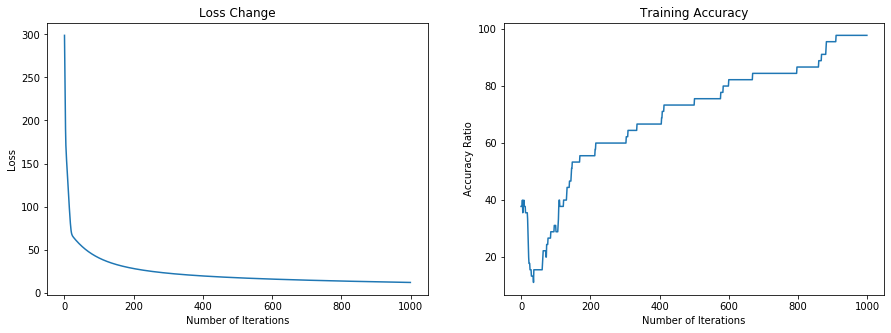

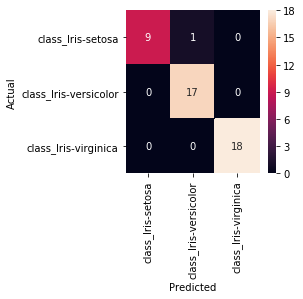

In [5]:
train_network(*split_data(x_data, y_data, 0.3))

Execute with 80/20 partition

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.62      0.77         8
           2       0.81      1.00      0.90        13

    accuracy                           0.90        30
   macro avg       0.94      0.88      0.89        30
weighted avg       0.92      0.90      0.89        30



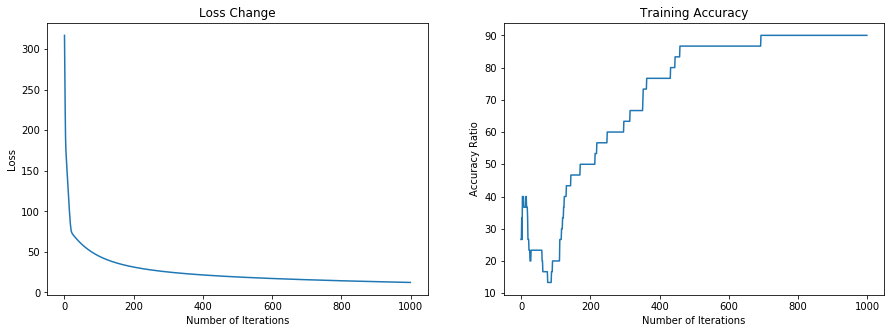

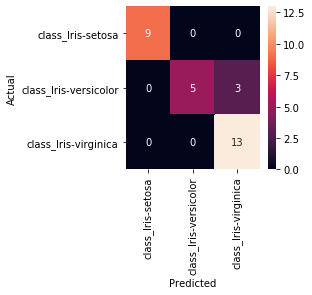

In [6]:
train_network(*split_data(x_data, y_data, 0.2))

Execute with 90/10 partition

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



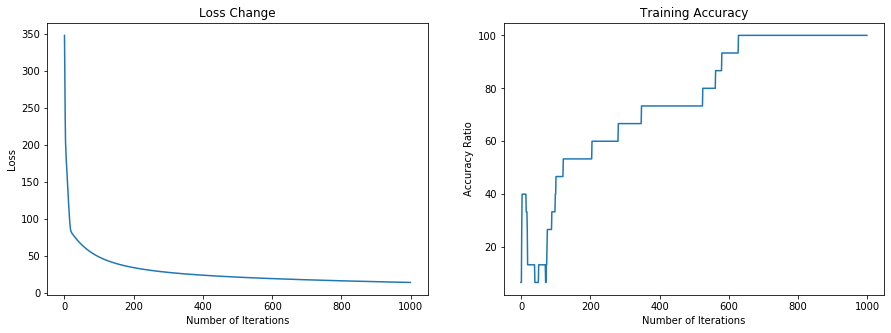

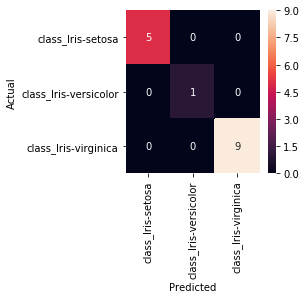

In [7]:
train_network(*split_data(x_data, y_data, 0.1))